In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

## 1.Sigmoid函数求导

![](https://github.com/zfhxi/Learn_tensorflow/blob/master/ch07-%E5%8F%8D%E5%90%91%E4%BC%A0%E6%92%AD%E7%AE%97%E6%B3%95/img/04.png?raw=true)

导数曲线可见曲线两端的梯度值很小，那么网络层数增加后，较前层的参数由于梯度值非常微小，参数长时间得不到有效更新，无法训练较深层的神经网络，导致网络一致停留在浅层的更新。
<!-- ![](https://github.com/zfhxi/Learn_tensorflow/blob/master/ch07-%E5%8F%8D%E5%90%91%E4%BC%A0%E6%92%AD%E7%AE%97%E6%B3%95/img/05.png?raw=true) -->

Numpy实现Sigmoid函数求导：

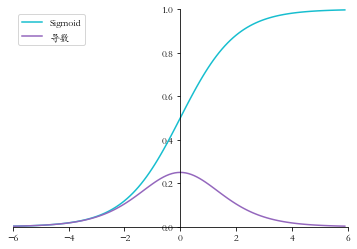

In [2]:
import numpy as np
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x)*(1-sigmoid(x))

def set_plt_ax():
    # get current axis 获得坐标轴对象
    ax = plt.gca()

    ax.spines['right'].set_color('none')
    # 将右边 上边的两条边颜色设置为空 其实就相当于抹掉这两条边
    ax.spines['top'].set_color('none')

    ax.xaxis.set_ticks_position('bottom')
    # 指定下边的边作为 x 轴，指定左边的边为 y 轴
    ax.yaxis.set_ticks_position('left')

    # 指定 data  设置的bottom(也就是指定的x轴)绑定到y轴的0这个点上
    ax.spines['bottom'].set_position(('data', 0))
    ax.spines['left'].set_position(('data', 0))

x = np.arange(-6.0, 6.0, 0.1)
sigmoid_y = sigmoid(x)
sigmoid_derivative_y = sigmoid_derivative(x)

set_plt_ax()
plt.plot(x, sigmoid_y, color='C9', label='Sigmoid')
plt.plot(x, sigmoid_derivative_y, color='C4', label='导数')
plt.xlim(-6, 6)
plt.ylim(0, 1)
plt.legend(loc=2)
plt.show()

## 2.ReLU函数求导

![](https://github.com/zfhxi/Learn_tensorflow/blob/master/ch07-%E5%8F%8D%E5%90%91%E4%BC%A0%E6%92%AD%E7%AE%97%E6%B3%95/img/06.png?raw=true)

ReLU函数的导数计算简单，x大于等于零的时候，导数值恒为1，在反向传播过程中，它既不会放大梯度，造成梯度爆炸(Gradient exploding)现象；也不会缩小梯度，造成梯度弥散(Gradient vanishing)现象，导数曲线:
<!--![](https://github.com/zfhxi/Learn_tensorflow/blob/master/ch07-%E5%8F%8D%E5%90%91%E4%BC%A0%E6%92%AD%E7%AE%97%E6%B3%95/img/07.png?raw=true)-->

Numpy实现求导:

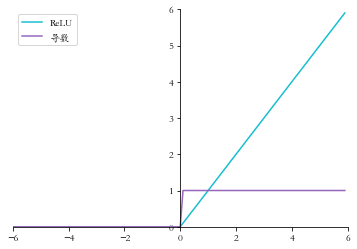

In [3]:
def relu(x):
    return np.maximum(0,x)
def relu_derivative(x):
    d=np.array(x,copy=True)
    d[x<0]=0
    d[x>=0]=1
    return d
x = np.arange(-6.0, 6.0, 0.1)
relu_y = relu(x)
relu_derivative_y = relu_derivative(x)

set_plt_ax()
plt.plot(x, relu_y, color='C9', label='ReLU')
plt.plot(x, relu_derivative_y, color='C4', label='导数')
plt.xlim(-6, 6)
plt.ylim(0, 6)
plt.legend(loc=2)
plt.show()

## 3.LeakyReLU函数求导

![](https://github.com/zfhxi/Learn_tensorflow/blob/master/ch07-%E5%8F%8D%E5%90%91%E4%BC%A0%E6%92%AD%E7%AE%97%E6%B3%95/img/08.png?raw=true)

导数曲线如下，其克服了ReLU函数的缺陷
<!--![](https://github.com/zfhxi/Learn_tensorflow/blob/master/ch07-%E5%8F%8D%E5%90%91%E4%BC%A0%E6%92%AD%E7%AE%97%E6%B3%95/img/09.png?raw=true)-->

Numpy实现求导:

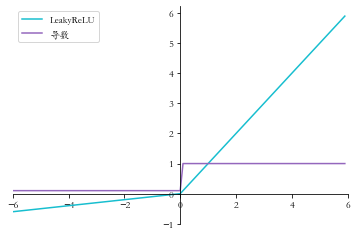

In [4]:
def leakyrelu(x, p):
    y = np.copy(x)
    y[y < 0] = p * y[y < 0]
    return y

def leakyrelu_derivative(x,p):
    dx=np.ones_like(x)
    dx[x<0]=p
    return dx

x = np.arange(-6.0, 6.0, 0.1)
p = 0.1
leakyrelu_y = leakyrelu(x, p)
leakyrelu_derivative_y = leakyrelu_derivative(x, p)

set_plt_ax()
plt.plot(x, leakyrelu_y, color='C9', label='LeakyReLU')
plt.plot(x, leakyrelu_derivative_y, color='C4', label='导数')
plt.xlim(-6, 6)
plt.yticks(np.arange(-1, 7))
plt.legend(loc=2)
plt.show()

## 4.Tanh函数梯度

![](https://github.com/zfhxi/Learn_tensorflow/blob/master/ch07-%E5%8F%8D%E5%90%91%E4%BC%A0%E6%92%AD%E7%AE%97%E6%B3%95/img/10.png?raw=true)

<!--
导数曲线
![](https://github.com/zfhxi/Learn_tensorflow/blob/master/ch07-%E5%8F%8D%E5%90%91%E4%BC%A0%E6%92%AD%E7%AE%97%E6%B3%95/img/11.png?raw=true)-->

Numpy实现求导：

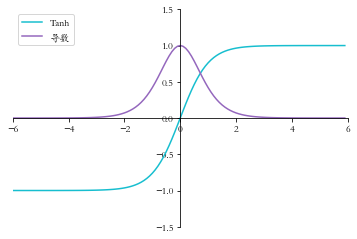

In [5]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
def tanh(x):
    return 2*sigmoid(2*x)-1

def tanh_derivative(x):
    return 1-tanh(x)**2

x = np.arange(-6.0, 6.0, 0.1)
tanh_y = tanh(x)
tanh_derivative_y = tanh_derivative(x)

set_plt_ax()
plt.plot(x, tanh_y, color='C9', label='Tanh')
plt.plot(x, tanh_derivative_y, color='C4', label='导数')
plt.xlim(-6, 6)
plt.ylim(-1.5, 1.5)
plt.legend(loc=2)
plt.show()

In [ ]:
import os
pid=os.getpid()
!kill -9 $pid